In [1]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [2]:
path_cats_and_dogs = f"{getcwd()}/../tmp2/cats-and-dogs.zip"
shutil.rmtree('/tmp')

local_zip = path_cats_and_dogs
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [3]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

1500
1500


In [7]:
try:
    base_dir = '/tmp/cats-v-dogs'
    os.mkdir(base_dir)
    os.mkdir(os.path.join(base_dir,'training/'))
    os.mkdir(os.path.join(base_dir,'testing/'))
    os.mkdir(os.path.join(base_dir,'training/cats/'))
    os.mkdir(os.path.join(base_dir,'training/dogs/'))
    os.mkdir(os.path.join(base_dir,'testing/cats/'))
    os.mkdir(os.path.join(base_dir,'testing/dogs/'))
    
except OSError:
    pass

In [8]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    
    img_temp = [img for img in os.listdir(SOURCE) if os.path.getsize(SOURCE+img)>0]
    img_temp = random.sample(img_temp, len(img_temp))
    
    for f in img_temp[0:int(len(img_temp)*SPLIT_SIZE)]:
        copyfile(SOURCE+f, TRAINING+f)
    
    for f in img_temp[int(len(img_temp)*SPLIT_SIZE):]:
        copyfile(SOURCE+f, TESTING+f)

CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

In [9]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

1350
1350
150
150


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=1, activation=tf.nn.sigmoid)
])

In [15]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

# NOTE:

In the cell below you **MUST** use a batch size of 10 (`batch_size=10`) for the `train_generator` and the `validation_generator`. Using a batch size greater than 10 will exceed memory limits on the Coursera platform.

In [17]:
TRAINING_DIR = '/tmp/cats-v-dogs/training/'
train_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, batch_size=10,
                                                    class_mode='binary', target_size=(150,150))

VALIDATION_DIR = '/tmp/cats-v-dogs/testing'
validation_datagen = ImageDataGenerator(rescale=1./255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, batch_size=10,
                                                              class_mode='binary', target_size=(150,150))

Found 2700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [18]:
history = model.fit_generator(train_generator, epochs=2, verbose=1, validation_data=validation_generator)

Epoch 1/2
270/270 [==============================] - 37s 138ms/step - loss: 0.7158 - acc: 0.5494 - val_loss: 0.6151 - val_acc: 0.6533
Epoch 2/2
270/270 [==============================] - 30s 111ms/step - loss: 0.6061 - acc: 0.6718 - val_loss: 0.6133 - val_acc: 0.7000


In [20]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

Text(0.5, 1.0, 'Training and validation accuracy')

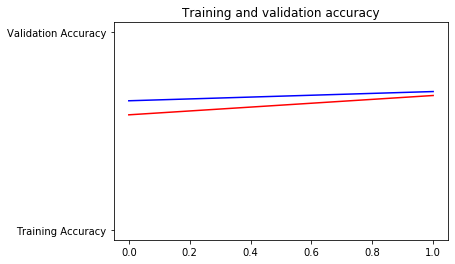

In [24]:
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')

Text(0.5, 1.0, 'Training and validation loss')

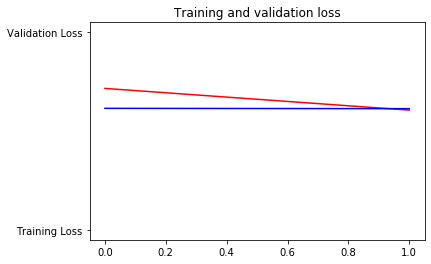

In [23]:
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')